### Задание

Создайте систему компьютерного зрения, которая будет определять тип геометрической фигуры. Используя подготовленную базу и шаблон ноутбука проведите серию экспериментов по перебору гиперпараметров нейронной сети, распознающей три категории изображений (треугольник, круг, квадрат).

1. Поменяйте количество нейронов в сети, используя следующие значения:

- один слой 10 нейронов
- один слой 100 нейронов
- один слой 5000 нейронов.

2. Поменяйте активационную функцию в скрытых слоях с `relu` на `linear`.
3. Поменяйте размеры batch_size:
- 10
- 100
- 1000

4. Выведите на экран получившиеся точности.

Всего должно получиться 18 комбинаций указанных параметров.

Создайте сравнительную таблицу по результатам проведенных тестов.

Комбинации параметров:
<table border="1">
    <tr>
        <td><b>Количество нейров в сети</td>
        <td><b>Batch Size</td>
        <td><b>Активационная функция</td>
    </tr>
    <tr>
        <td>10</td>
        <td>10</td>
        <td>relu</td>
    </tr>
    <tr>
        <td>10</td>
        <td>100</td>
        <td>relu</td>
    </tr>
    <tr>
        <td>10</td>
        <td>1000</td>
        <td>relu</td>
    </tr>
    <tr>
        <td>100</td>
        <td>10</td>
        <td>relu</td>
    </tr>
    <tr>
        <td>100</td>
        <td>100</td>
        <td>relu</td>
    </tr>
    <tr>
        <td>100</td>
        <td>1000</td>
        <td>relu</td>
    </tr>
    <tr>
        <td>5000</td>
        <td>10</td>
        <td>relu</td>
    </tr>
    <tr>
        <td>5000</td>
        <td>100</td>
        <td>relu</td>
    </tr>
    <tr>
        <td>5000</td>
        <td>1000</td>
        <td>relu</td>
    </tr>
    <tr>
        <td>10</td>
        <td>10</td>
        <td>linear</td>
    </tr>
    <tr>
        <td>10</td>
        <td>100</td>
        <td>linear</td>
    </tr>
    <tr>
        <td>10</td>
        <td>1000</td>
        <td>linear</td>
    </tr>
    <tr>
        <td>100</td>
        <td>10</td>
        <td>linear</td>
    </tr>
    <tr>
        <td>100</td>
        <td>100</td>
        <td>linear</td>
    </tr>
    <tr>
        <td>100</td>
        <td>1000</td>
        <td>linear</td>
    </tr>
    <tr>
        <td>5000</td>
        <td>10</td>
        <td>linear</td>
    </tr>
    <tr>
        <td>5000</td>
        <td>100</td>
        <td>linear</td>
    </tr>
    <tr>
        <td>5000</td>
        <td>1000</td>
        <td>linear</td>
    </tr>
</table>



Перед началом экспериментов, создадим нейронную сеть для распознавания и убедимся в ее работоспособности.

In [1]:
# Вывод изображения в ноутбуке, а не в консоли или файле
%matplotlib inline

### <b> Импорт библиотек: </b>

In [2]:
# Подключение модуля для работы с файлами
import os
# Подключение библиотеки для работы с массивами
import numpy as np
# Подключение библиотеки для отрисовки изображений
import matplotlib.pyplot as plt
# Подключение функции для разделения данных на обучающий и тестовый наборы
from sklearn.model_selection import train_test_split
# Подключение утилит для to_categorical
from tensorflow.keras import utils
# Подключение класса для создания нейронной сети прямого распространения
from tensorflow.keras.models import Sequential
# Подключение класса для создания полносвязного слоя
from tensorflow.keras.layers import Dense
# Подключение оптимизатора
from tensorflow.keras.optimizers import Adam
# Подключение библиотеки для загрузки изображений
from tensorflow.keras.preprocessing import image
# Подключение функции для преобразования меток классов в категориальное представление
from tensorflow.keras.utils import to_categorical

### <b> Загрузка данных для Google Colab </b>
Закоментировано, так как необходимые файлы были загружены локально.

In [3]:
# Загрузка датасета из облака
# import gdown
# gdown.download('https://storage.yandexcloud.net/aiueducation/Content/base/l3/hw_light.zip', None, quiet=True)

# Распаковываем архив hw_light.zip в папку hw_light
# !unzip -q hw_light.zip

### <b> Обработка изображения для последующей работы с ними </b>
На данном этапе происходит добавление изображений в массив x_train и меток к ним в y_train. <br>
Предварительно, из скачанного набора данных, больше половины было отведено для тренировки, а оставшиеся картинки - как тестовый набор. 

In [4]:
# Обучающие данные
base_dir = 'hw_light'
x_train = []
y_train = []
img_height = 20
img_width = 20

# Перебор папок в директории базы
for patch in os.listdir(base_dir):
    for img in os.listdir(os.path.join(base_dir, patch)):
        x_train.append(image.img_to_array(image.load_img(base_dir + '/' + patch + '/' + img,
                                                    target_size=(img_height, img_width),
                                                    color_mode='grayscale')))
        if patch == '0':
            y_train.append(0)
        elif patch == '3':
            y_train.append(1)
        else:
            y_train.append(2)

# Преобразование в numpy-массив загруженных изображений и меток классов
x_train_org = np.array(x_train)
y_train_org = np.array(y_train)

print('Размер массива x_train:', x_train_org.shape)
print('Размер массива y_train:', y_train_org.shape)

plt.show()

# Разделение данных на обучающий и тестовый наборы
x_train_org, x_test_org, y_train_org, y_test_org = train_test_split(x_train_org, y_train_org, test_size=0.2,
                                                                    random_state=42)

Размер массива x_train: (302, 20, 20, 1)
Размер массива y_train: (302,)


### <b> Проверка добавленных изображений и меток на примере одного из них: </b>

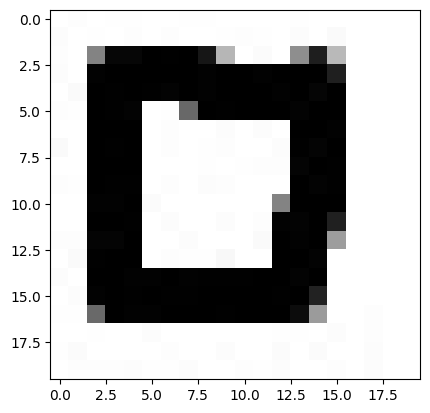

2


In [5]:
# Номер картинки
n = 50

# Отрисовка картинки
plt.imshow(x_train_org[n], cmap='gray')

# Вывод n-й картинки
plt.show()

# Вывод метки класса для n-го изображения
print(y_train_org[n])

### <b> Изменение формы входных картинок в одномерную последовательность чисел (избавляемся от сложности данных): </b>

In [6]:
# Изменение формы входных картинок с 28х28 на 302
# Первая ось остается без изменения, остальные складываются в вектор
x_train = x_train_org.reshape(x_train_org.shape[0], -1)
x_test = x_test_org.reshape(x_test_org.shape[0], -1)

# Проверка результата
print(f'Форма обучающих данных: {x_train_org.shape} -> {x_train.shape}')
print(f'Форма тестовых данных: {x_test_org.shape} -> {x_test.shape}')

Форма обучающих данных: (241, 20, 20, 1) -> (241, 400)
Форма тестовых данных: (61, 20, 20, 1) -> (61, 400)


### <b> Нормализуем данные (0-255 -> 0-1) </b>

In [7]:
# Нормализация входных картинок
# Преобразование x_train в тип float32 (числа с плавающей точкой) и нормализация
x_train = x_train.astype('float32') / 255.

# Преобразование x_test в тип float32 (числа с плавающей точкой) и нормализация
x_test = x_test.astype('float32') / 255.

### <b> Задание константы количества распознаваемых классов </b>
В нашем случае, классов будет три: круг, треугольник и квадрат.

In [8]:
# Задание константы количества распознаваемых классов
CLASS_COUNT = 3

### <b> Преобразование ответов (меток) в формат one_hot_encoding </b>

Это значит, что каждое число будет представлять собой последовательность (вектор) значений **0** или **1**. Последовательность будет длиной **3**, потому что всего существует **3** фигуры на распознавание. В векторе one hot encoding везде стоят нули, кроме позиции самой метки.

In [9]:
# Преобразование ответов в формат one_hot_encoding
y_train = utils.to_categorical(y_train_org, CLASS_COUNT)
y_test = utils.to_categorical(y_test_org, CLASS_COUNT)

# Вывод формы y_train
print(y_train.shape)
# Вывод примера одного выходного вектора
print(y_train[0])

(241, 3)
[0. 1. 0.]


### <b> Просмотр меток элементов </b>

In [10]:
# Вывод формы массива меток
print(y_train_org.shape)
# Вывод метки, соответствующей 36-му элементу
print(y_train_org[36])

(241,)
0


### <b> Создание нейронной сети модели </b>
Для примера, создадим модель с двумя полносвязными слоями.
<br> В качестве параметра input_dim задаем число 400, просмотрев вывод формы данных после решейпинга.
<blockquote> Форма обучающих данных: (302, 20, 20, 1) -> (302, <b>400</b>) </blockquote>

In [11]:
# Создание последовательной модели
model = Sequential()

# Добавление полносвязного слоя на 1000 нейронов с relu-активацией
model.add(Dense(1000, input_dim=400, activation='relu'))

# Добавление полносвязного слоя с количеством нейронов по числу классов с softmax-активацией
model.add(Dense(CLASS_COUNT, activation='softmax'))

### <b> Компиляция модели, просмотр её структуры </b>

In [12]:
# Компиляция модели
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Вывод структуры модели
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              401000    
                                                                 
 dense_1 (Dense)             (None, 3)                 3003      
                                                                 
Total params: 404003 (1.54 MB)
Trainable params: 404003 (1.54 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


### <b> Обучение созданной модели на данных </b>

In [13]:
history = model.fit(x_train,        # обучающая выборка, входные данные
          y_train,        # обучающая выборка, выходные данные
          batch_size=10, # кол-во примеров, которое обрабатывает нейронка перед одним изменением весов
          epochs=15,      # количество эпох, когда нейронка обучается на всех примерах выборки
          validation_data=(x_test, y_test), # разделение для набора валидации
          verbose=1)      # 0 - не визуализировать ход обучения, 1 - визуализировать


Epoch 1/15


25/25 [==============================] - 1s 9ms/step - loss: 1.3305 - accuracy: 0.4855 - val_loss: 0.7979 - val_accuracy: 0.7049
Epoch 2/15
25/25 [==============================] - 0s 4ms/step - loss: 0.7013 - accuracy: 0.7178 - val_loss: 0.9603 - val_accuracy: 0.5574
Epoch 3/15
25/25 [==============================] - 0s 4ms/step - loss: 0.5157 - accuracy: 0.8133 - val_loss: 0.7088 - val_accuracy: 0.7213
Epoch 4/15
25/25 [==============================] - 0s 4ms/step - loss: 0.4589 - accuracy: 0.8008 - val_loss: 0.6210 - val_accuracy: 0.7541
Epoch 5/15
25/25 [==============================] - 0s 4ms/step - loss: 0.4349 - accuracy: 0.8050 - val_loss: 0.5825 - val_accuracy: 0.8033
Epoch 6/15
25/25 [==============================] - 0s 4ms/step - loss: 0.3388 - accuracy: 0.8838 - val_loss: 0.6423 - val_accuracy: 0.8033
Epoch 7/15
25/25 [==============================] - 0s 4ms/step - loss: 0.2910 - accuracy: 0.8963 - val_loss: 0.6012 - val_accuracy: 0.8033
Epoch 8/15
25/25 [

### <b> Вывод графика точности на обучающей и проверочной выборках

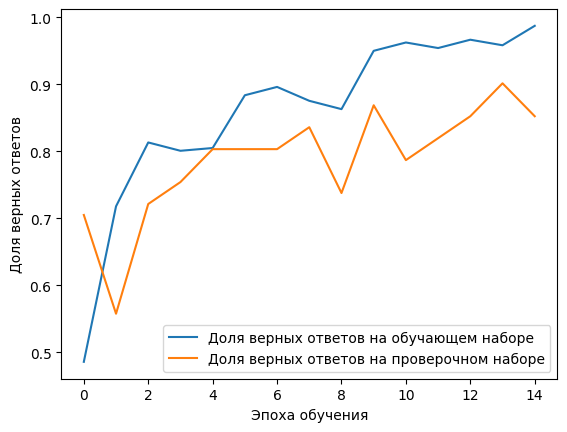

In [14]:
# Визуализация точности на обучающей выборке
plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')

# Визуализация точности на проверочной выборке
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')

# Отрисовка подписей осей
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')

# Отрисовка легенды
plt.legend()

# Вывод графика
plt.show()

### <b> Вывод графика ошибки на обучающей и проверочной выборках

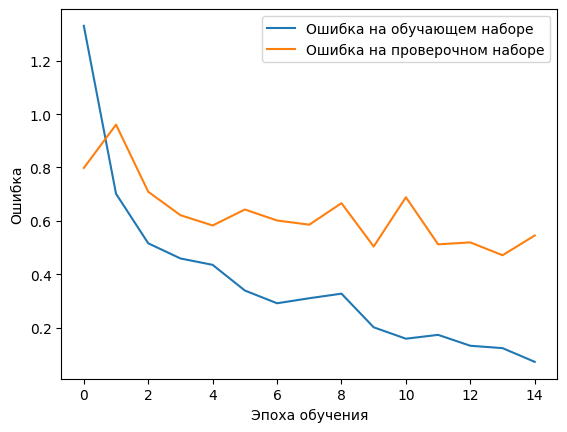

In [15]:
# Вывод графика ошибки
plt.plot(history.history['loss'],
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'],
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

### <b> Сохранение полученной модели </b>

In [16]:
# Сохранение весов модели в файл
model.save_weights('hw_lite_model.h5')
model.load_weights('hw_lite_model.h5')

### <b> Тестируем модель! </b>
Выберем рандомную картинку из набора тестовхых данных для распознавания.

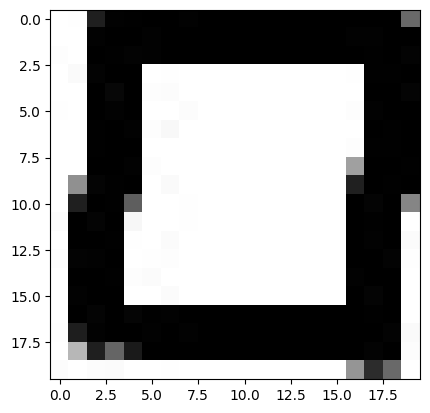

(400,)
(1, 400)
1/1 [==============================] - 0s 56ms/step
[[1.5443405e-06 8.0459969e-08 9.9999833e-01]]


0.9999999558704502

In [17]:
# Номер тестовой цифры, которую будем распознавать
n_rec = 50

# Отображение картинки из тестового набора под номером n_rec
plt.imshow(x_test_org[n_rec], cmap='gray')
plt.show()

# Выбор нужной картинки из тестовой выборки
x = x_test[n_rec]

# Проверка формы данных
print(x.shape)

# Добавление одной оси в начале, чтобы нейронка могла распознать пример
# Массив из одного примера, так как нейронка принимает именно массивы примеров (батчи) для распознавания
x = np.expand_dims(x, axis=0)

# Проверка формы данных
print(x.shape)

# Распознавание примера
prediction = model.predict(x)

# Вывод результата - вектор из 10 чисел
print(prediction)
sum(prediction[0])

### <b> Результат: </b>

In [18]:
# Получение и вывод индекса самого большого элемента (это значение цифры, которую распознала сеть)
pred = np.argmax(prediction)

match pred:
    case 0:
        print(f'Распознан круг!')

    case 1:
        print(f'Распознан треугольник!')

    case 2:
        print(f'Распознан квадрат!')
    
    case _:
        print("Нет совпадений!")

# Вывод правильного ответа для сравнения
match y_test_org[n_rec]:
    case 0:
        print(f'Правильный ответ: круг!')

    case 1:
        print(f'Правильный ответ: треугольник!')

    case 2:
        print(f'Правильный ответ: квадрат!')
    
    case _:
        print("Нет совпадений!")        

Распознан квадрат!
Правильный ответ: квадрат!


### <b> Теперь эксперименты!

Для перебора параметров тренировки создадим функцию, на входе которой будет:
<li> Количество нейронов
<li> Активационная функция
<li> Batch Size (Размер пакета)
<br> На выходе же получаем аккуратность натренированной модели.
<br> А для создания таблицы воспользуемся библиотекой pandas, взяв список словарей результатов как DataFrame.

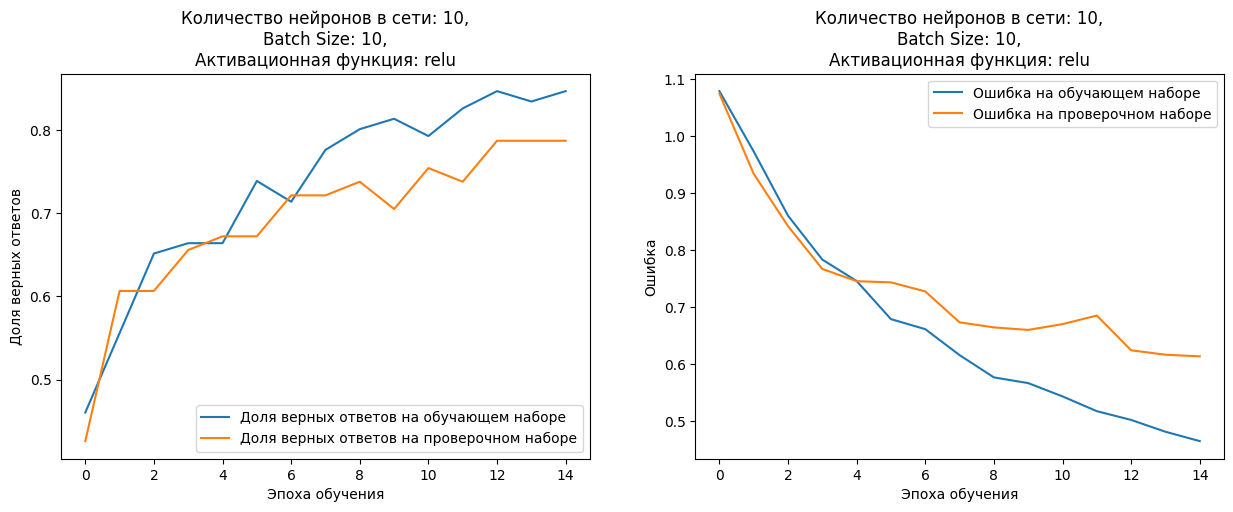

2/2 [==============================] - 0s 4ms/step - loss: 0.6134 - accuracy: 0.7869


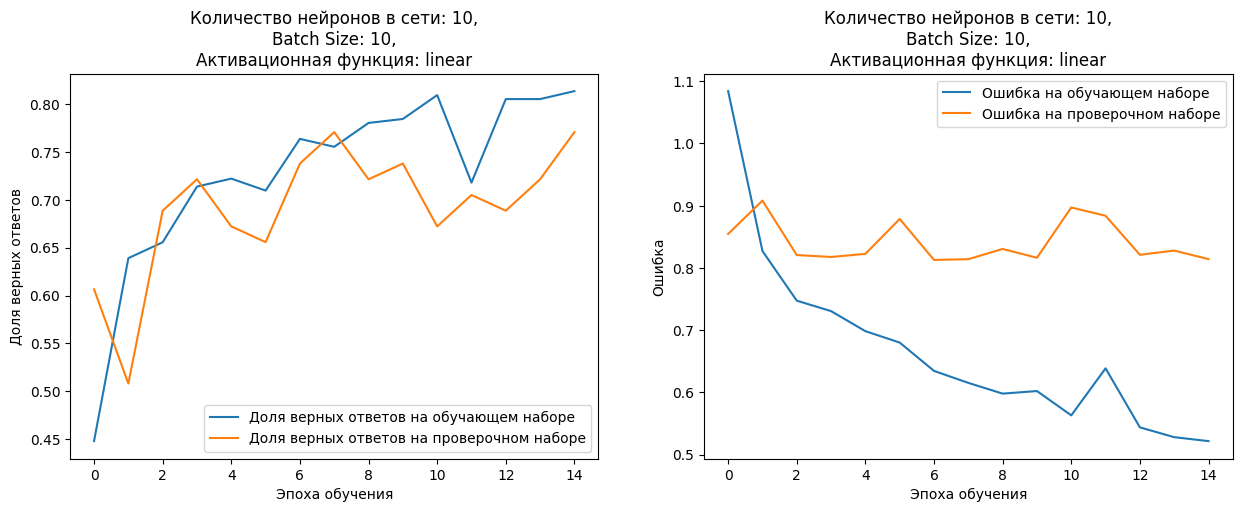

2/2 [==============================] - 0s 5ms/step - loss: 0.8142 - accuracy: 0.7705


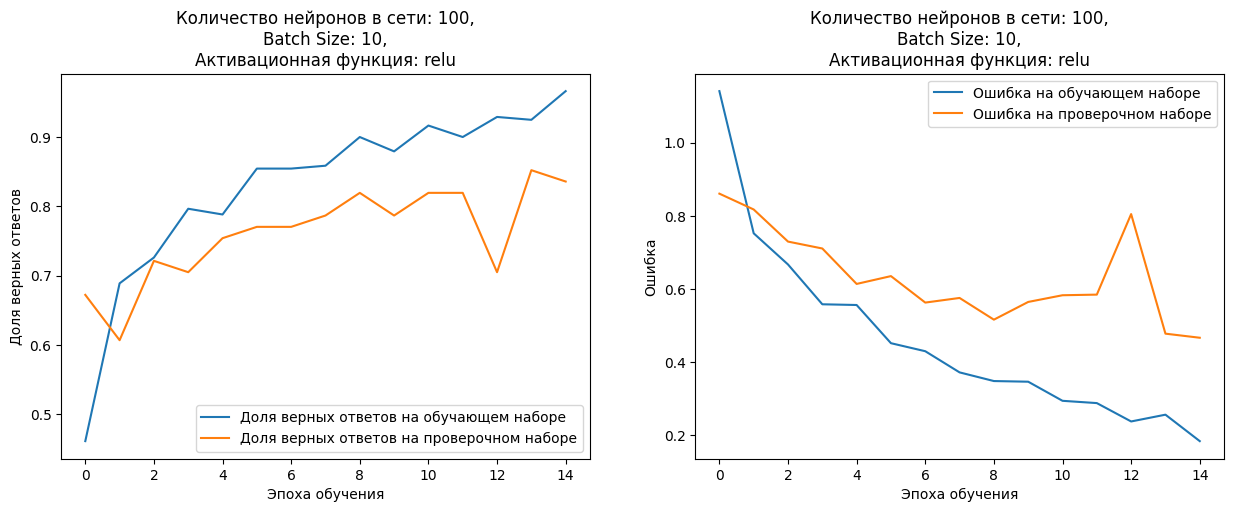

2/2 [==============================] - 0s 4ms/step - loss: 0.4666 - accuracy: 0.8361


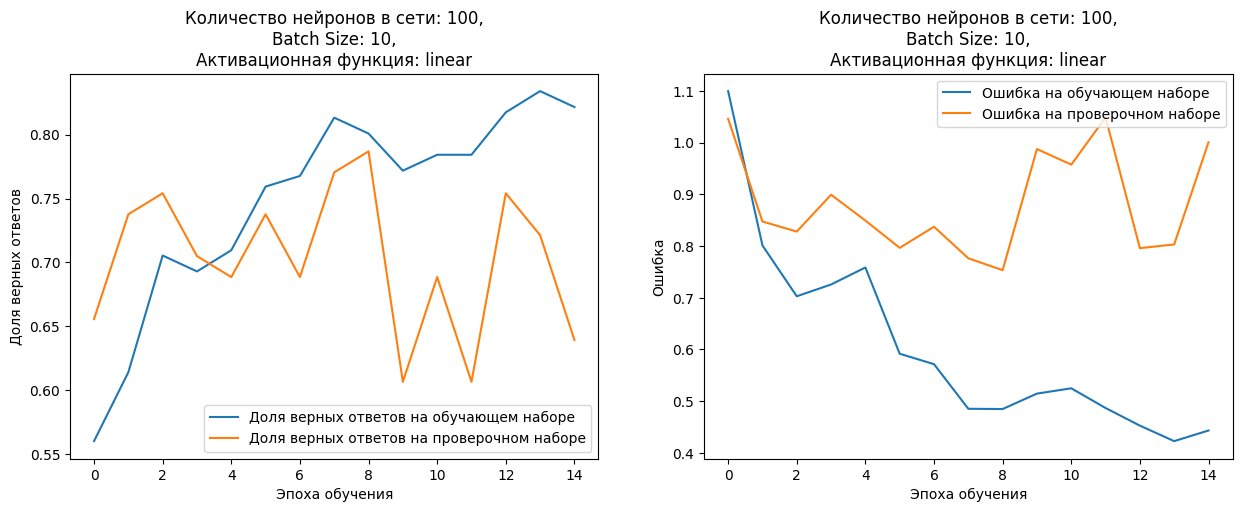

2/2 [==============================] - 0s 4ms/step - loss: 1.0008 - accuracy: 0.6393


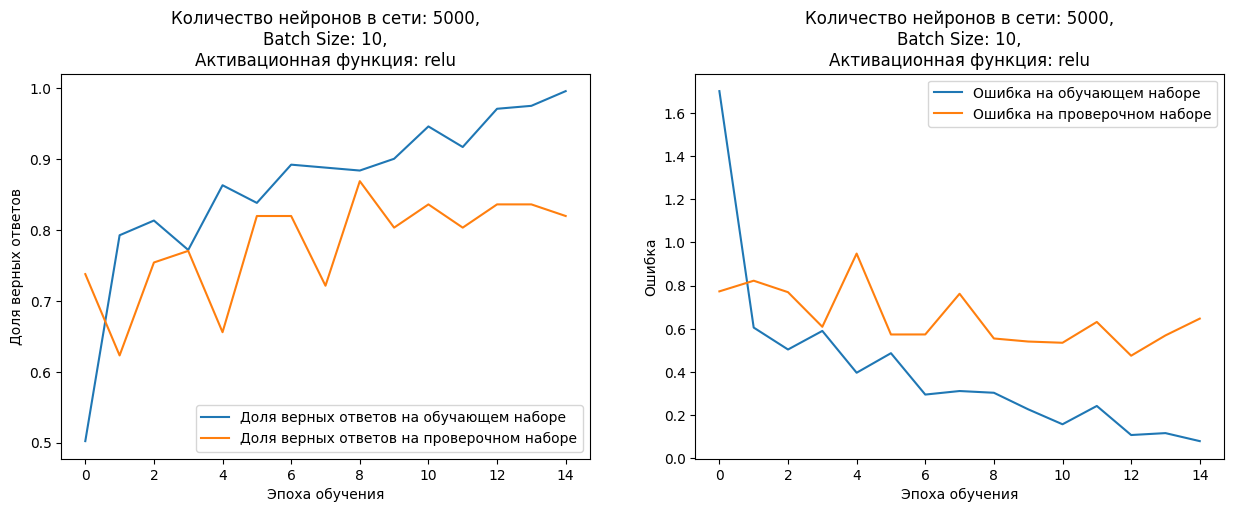

2/2 [==============================] - 0s 5ms/step - loss: 0.6470 - accuracy: 0.8197


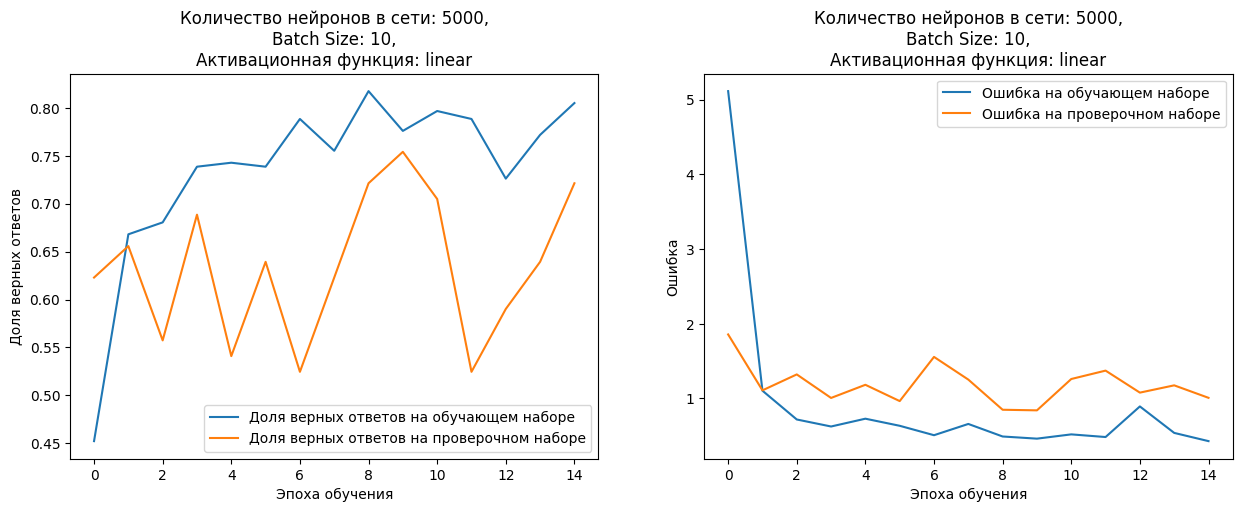

2/2 [==============================] - 0s 5ms/step - loss: 1.0083 - accuracy: 0.7213


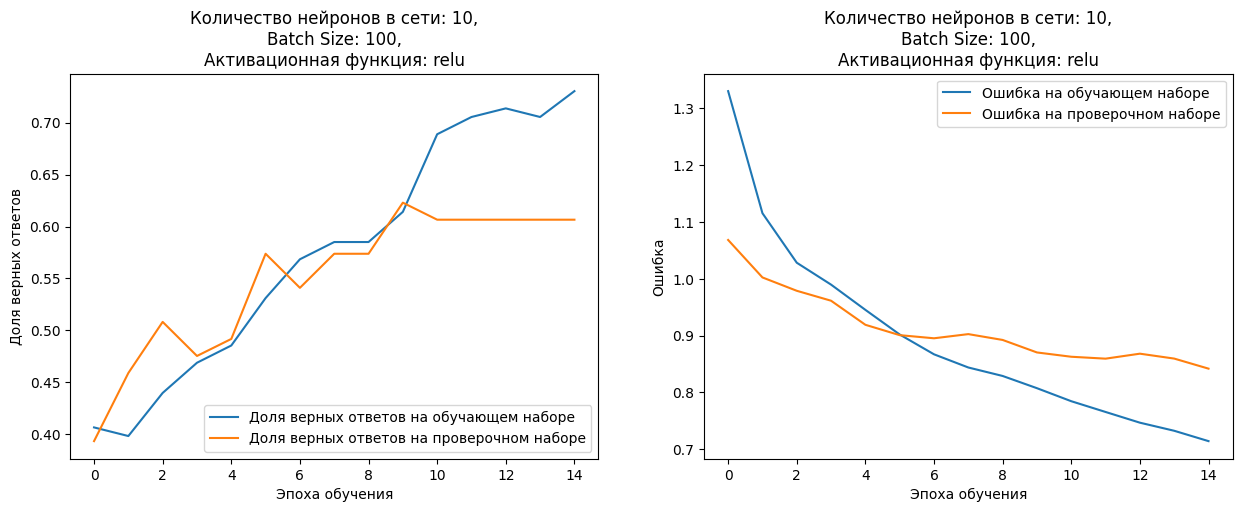

2/2 [==============================] - 0s 3ms/step - loss: 0.8419 - accuracy: 0.6066


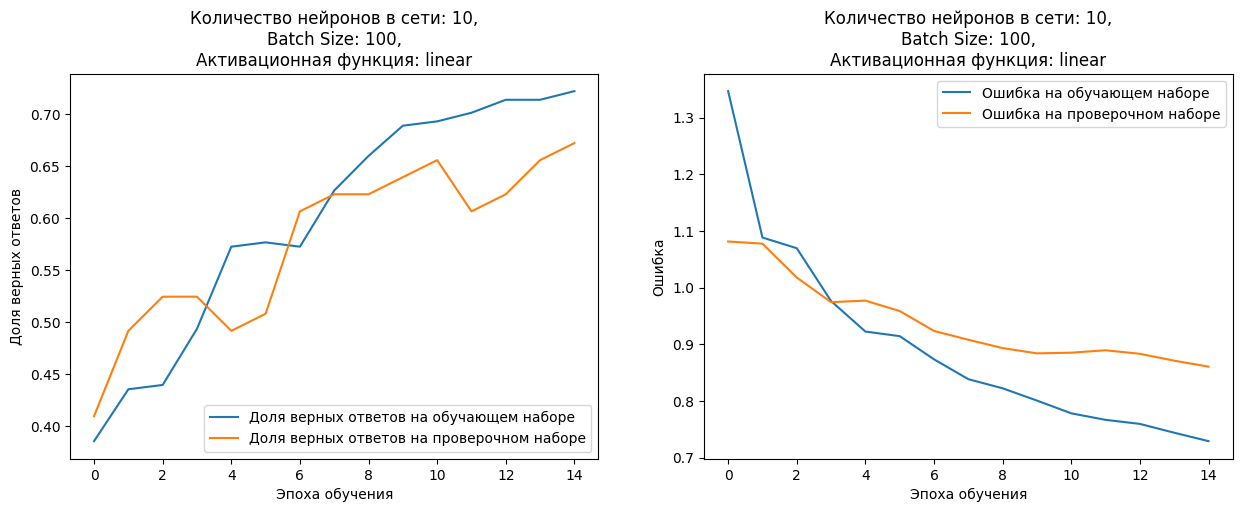

2/2 [==============================] - 0s 3ms/step - loss: 0.8604 - accuracy: 0.6721


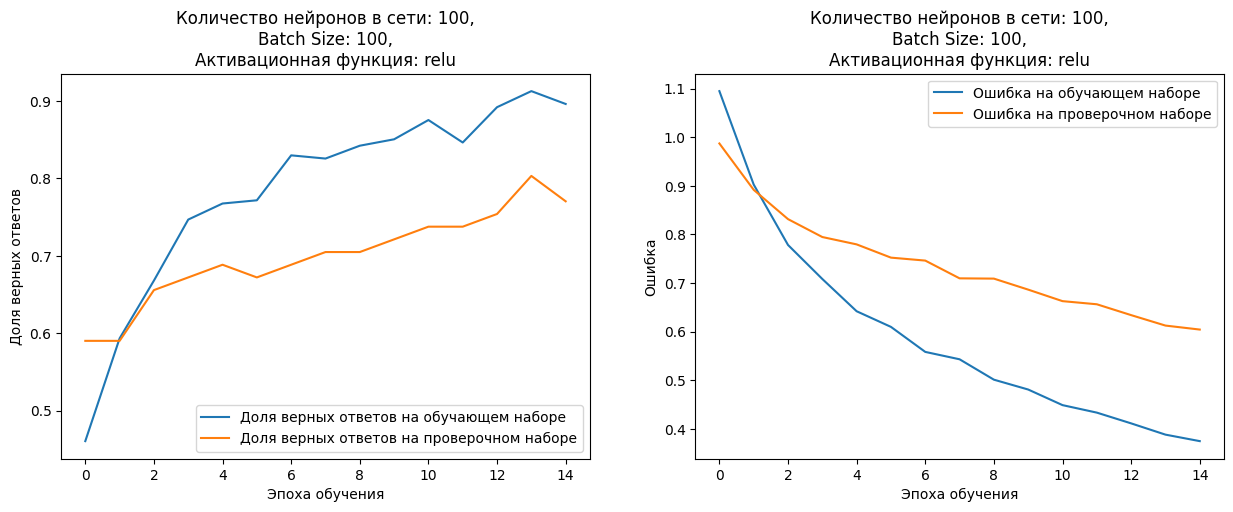

2/2 [==============================] - 0s 4ms/step - loss: 0.6040 - accuracy: 0.7705


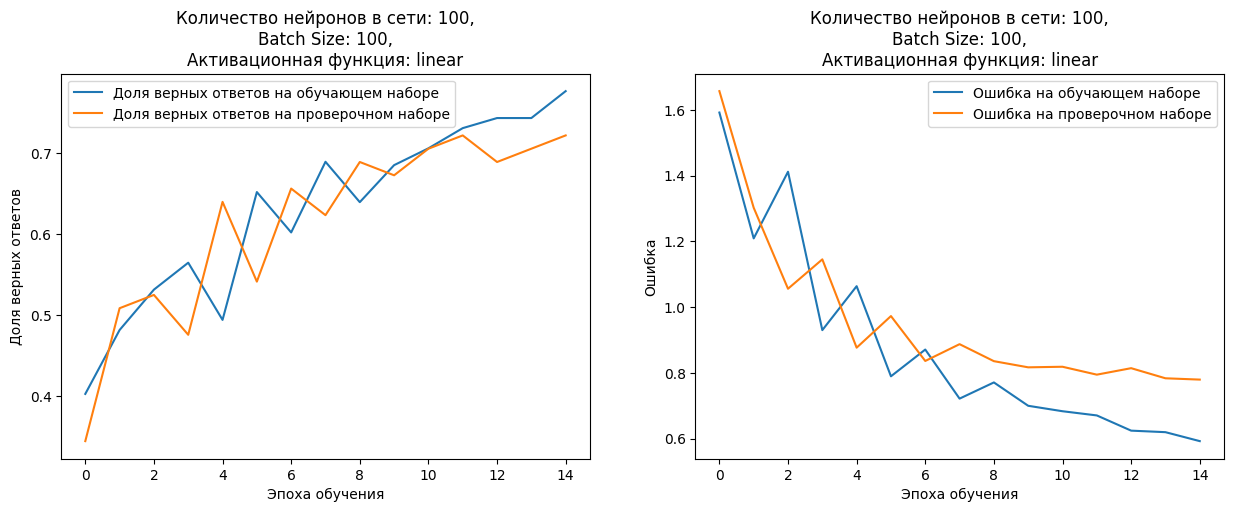

2/2 [==============================] - 0s 4ms/step - loss: 0.7793 - accuracy: 0.7213


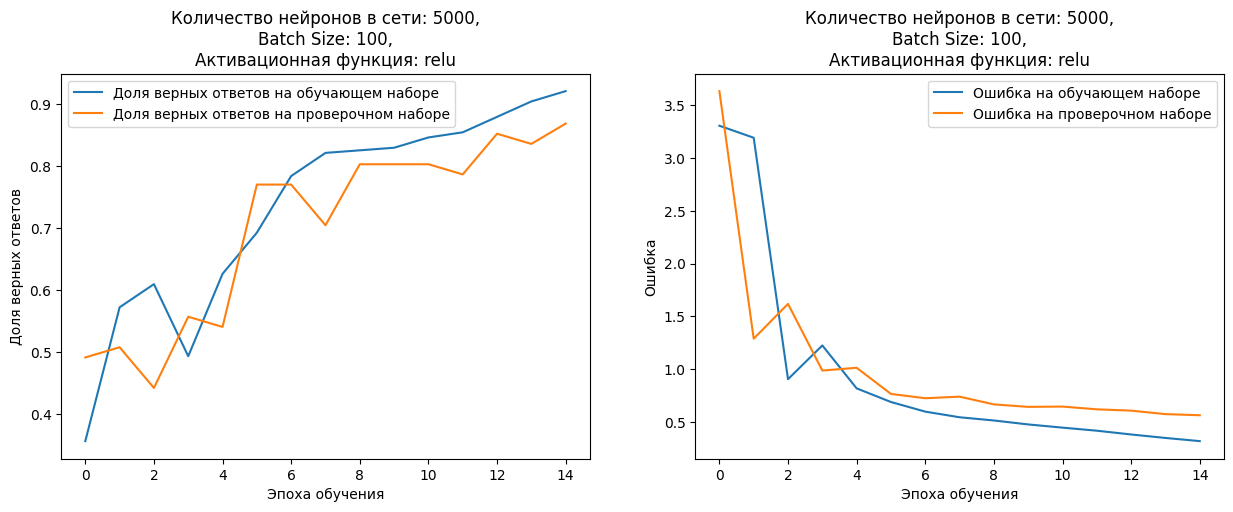

2/2 [==============================] - 0s 5ms/step - loss: 0.5613 - accuracy: 0.8689


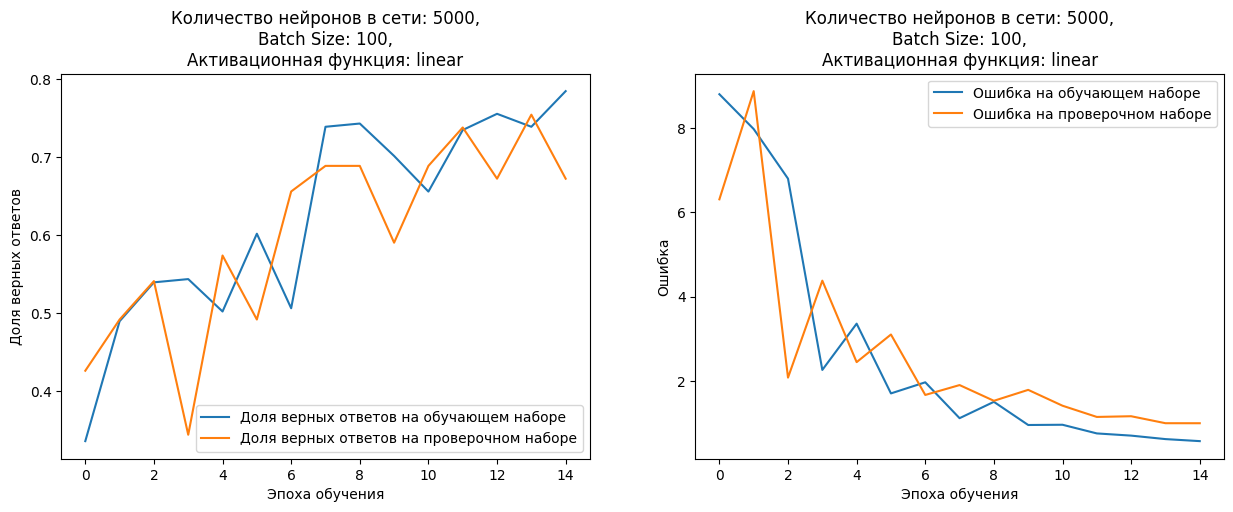

2/2 [==============================] - 0s 4ms/step - loss: 0.9943 - accuracy: 0.6721


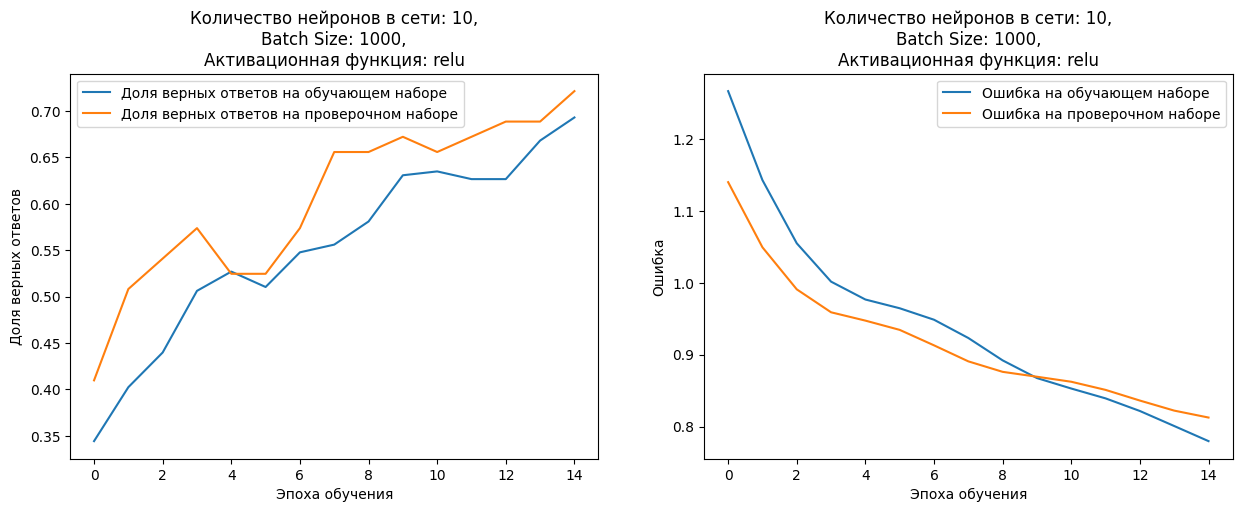

2/2 [==============================] - 0s 4ms/step - loss: 0.8126 - accuracy: 0.7213


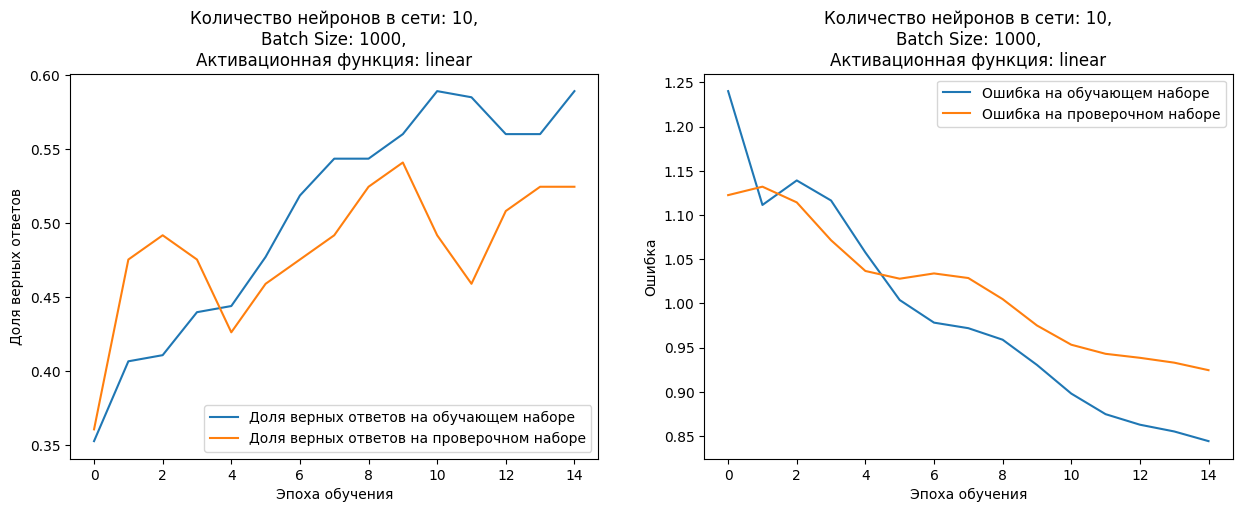

2/2 [==============================] - 0s 4ms/step - loss: 0.9244 - accuracy: 0.5246


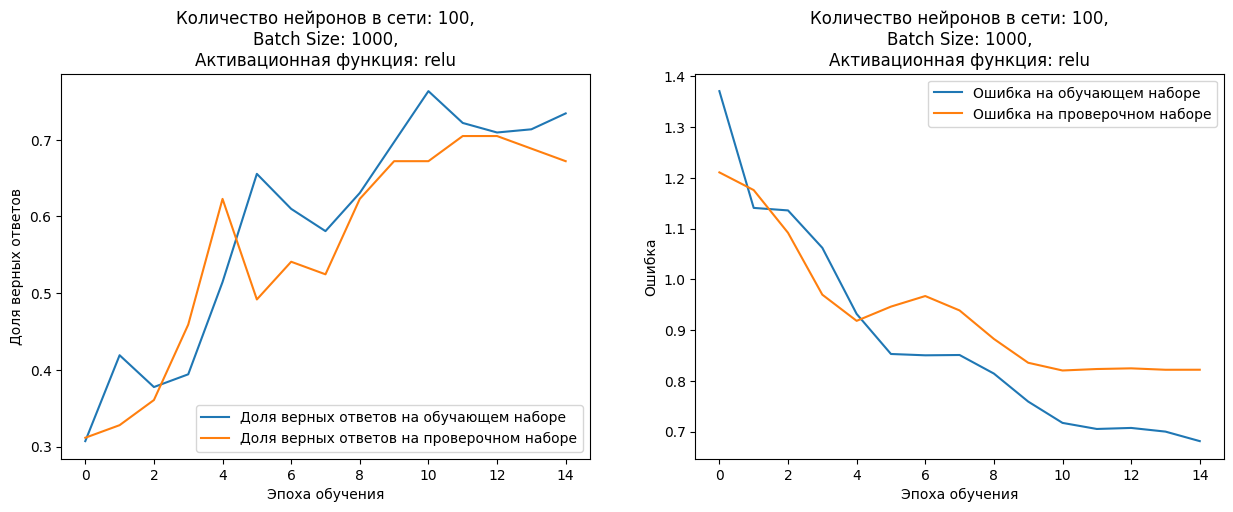

2/2 [==============================] - 0s 4ms/step - loss: 0.8220 - accuracy: 0.6721


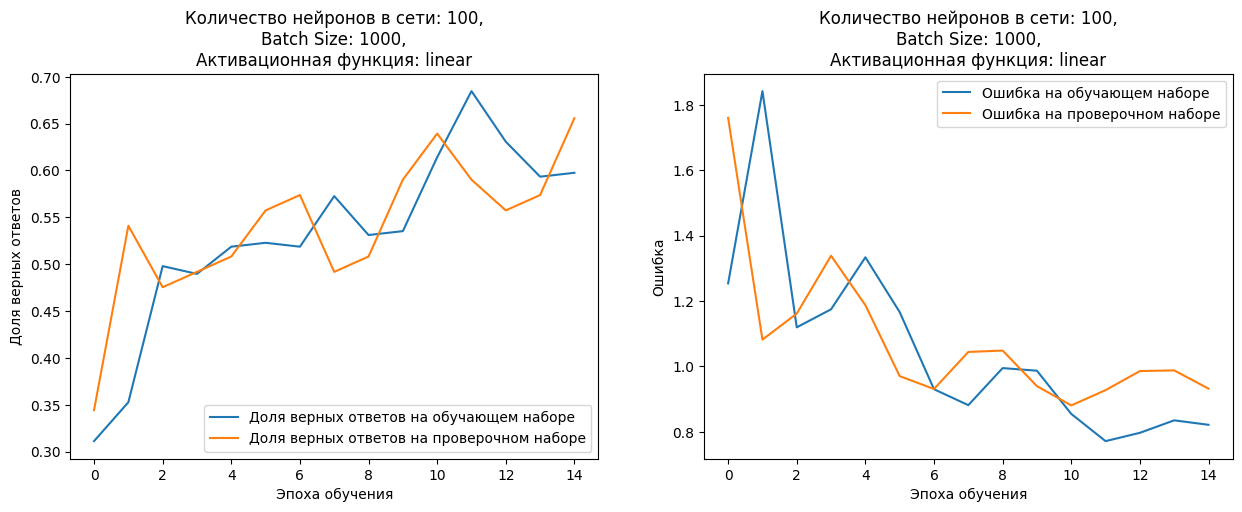

2/2 [==============================] - 0s 3ms/step - loss: 0.9319 - accuracy: 0.6557


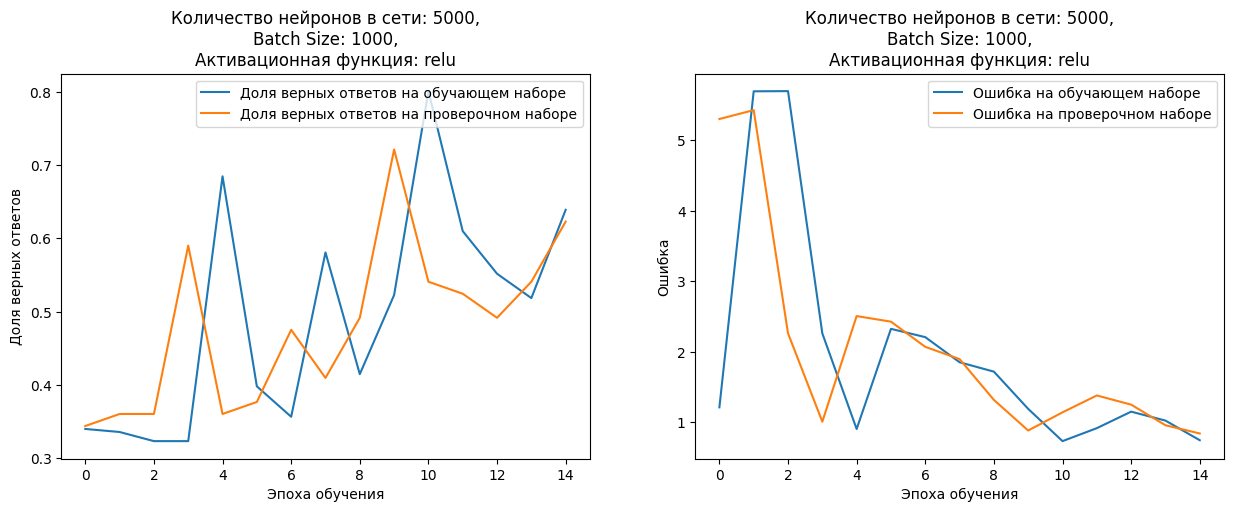

2/2 [==============================] - 0s 4ms/step - loss: 0.8429 - accuracy: 0.6230


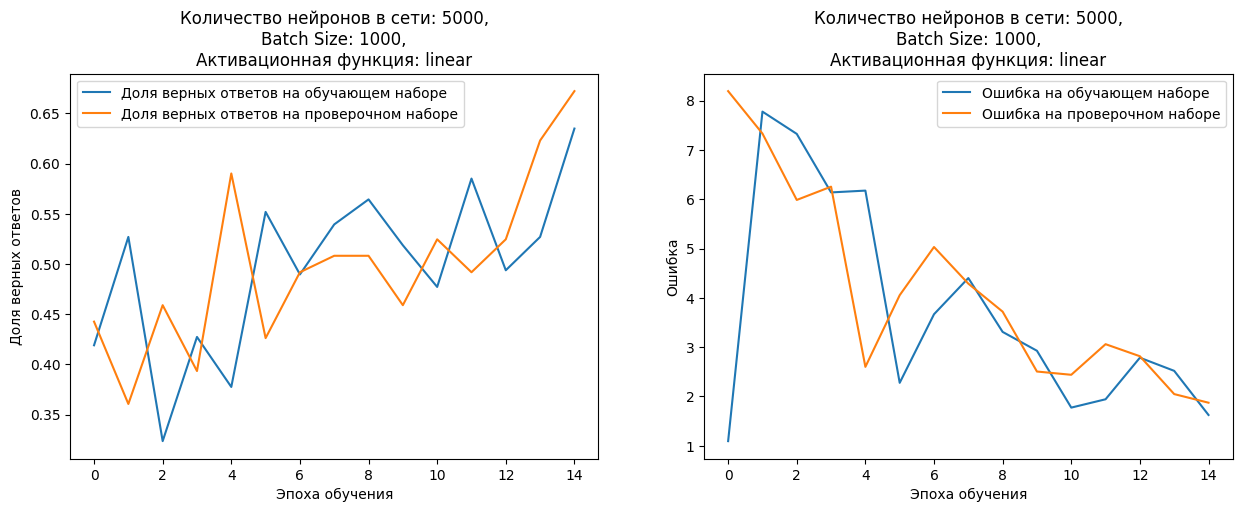

2/2 [==============================] - 0s 4ms/step - loss: 1.8729 - accuracy: 0.6721


In [19]:
import pandas as pd

epoch_count = 15

# Функция тренировки модели с разными параметрами
def train_model(neurons, activation_func, batch_size):
    model = Sequential([
        Dense(neurons, input_dim=400, activation=activation_func),
        Dense(3, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=epoch_count, batch_size=batch_size, verbose=0, validation_data=(x_test, y_test))
    

    # Создаем холст для двух графиков
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))

    # График точности
    axs[0].plot(history.history['accuracy'], label='Доля верных ответов на обучающем наборе')
    axs[0].plot(history.history['val_accuracy'], label='Доля верных ответов на проверочном наборе')
    axs[0].set_xlabel('Эпоха обучения')
    axs[0].set_ylabel('Доля верных ответов')
    axs[0].legend()
    axs[0].set_title(f"Количество нейронов в сети: {neurons},\nBatch Size: {batch_size},\nАктивационная функция: {activation_func}")

    # График ошибки
    axs[1].plot(history.history['loss'], label='Ошибка на обучающем наборе')
    axs[1].plot(history.history['val_loss'], label='Ошибка на проверочном наборе')
    axs[1].set_xlabel('Эпоха обучения')
    axs[1].set_ylabel('Ошибка')
    axs[1].legend()
    axs[1].set_title(f"Количество нейронов в сети: {neurons},\nBatch Size: {batch_size},\nАктивационная функция: {activation_func}")

    plt.show()

    _, accuracy = model.evaluate(x_test, y_test)
    return accuracy

# Параметры для перебора из условия задания
neurons_list = [10, 100, 5000]
activation_funcs = ['relu', 'linear']
batch_sizes = [10, 100, 1000]

results = []

# Перебор комбинаций параметров и обучение модели
for batch_size in batch_sizes:
    for neurons in neurons_list:
        for activation_func in activation_funcs:
            accuracy = train_model(neurons, activation_func, batch_size)
            results.append({'Нейроны': neurons,
                            'Активационная функция': activation_func,
                            'Batch Size': batch_size,
                            'Точность': accuracy})

### <b> Сравнительная таблица комбинаций параметров, полученные в процессе тренировки:

In [20]:
# Вывод результатов в виде таблицы
results_df = pd.DataFrame(results)
results_df.index = results_df.index + 1
print(results_df)

    Нейроны Активационная функция  Batch Size  Точность
1        10                  relu          10  0.786885
2        10                linear          10  0.770492
3       100                  relu          10  0.836066
4       100                linear          10  0.639344
5      5000                  relu          10  0.819672
6      5000                linear          10  0.721311
7        10                  relu         100  0.606557
8        10                linear         100  0.672131
9       100                  relu         100  0.770492
10      100                linear         100  0.721311
11     5000                  relu         100  0.868852
12     5000                linear         100  0.672131
13       10                  relu        1000  0.721311
14       10                linear        1000  0.524590
15      100                  relu        1000  0.672131
16      100                linear        1000  0.655738
17     5000                  relu        1000  0

### <b> Отсортируем по точности в порядке убывания: </b>

In [21]:
# Сортировка столбцу 'Точность'
results_df_sorted = results_df.sort_values(by='Точность', ascending=False)
print(results_df_sorted)

    Нейроны Активационная функция  Batch Size  Точность
11     5000                  relu         100  0.868852
3       100                  relu          10  0.836066
5      5000                  relu          10  0.819672
1        10                  relu          10  0.786885
9       100                  relu         100  0.770492
2        10                linear          10  0.770492
13       10                  relu        1000  0.721311
10      100                linear         100  0.721311
6      5000                linear          10  0.721311
8        10                linear         100  0.672131
12     5000                linear         100  0.672131
15      100                  relu        1000  0.672131
18     5000                linear        1000  0.672131
16      100                linear        1000  0.655738
4       100                linear          10  0.639344
17     5000                  relu        1000  0.622951
7        10                  relu         100  0

### <b> Из таблицы видно: </b>
<li> Для обоих активационных функций максимальная точность в данном случае достигается при использовании 5000 нейронов, следовательно увеличение количества нейронов в сети приводит к увеличению точности моделей.
<li> Увеличение значения Batch Size для некоторых комбинаций параметров приводит к увеличению точности, в то время как для других комбинаций результат может быть обратным.